## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [1]:
%pylab inline
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [4]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  4462k      0  0:00:17  0:00:17 --:--:-- 5476k


### Get the statistics from the Pickle File

In [2]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT_TAVG_RANGE.pickle','r'))

In [3]:
STAT.keys()

['TAVG', 'TRANGE']

In [4]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [5]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

mean:110.231356 std:112.761753 low1000:-177.500000 low100:-177.500000 high100:302.500000 high1000:344.500000
mean:131.168448 std:61.742075 low1000:22.000000 low100:22.000000 high100:267.000000 high1000:317.000000


### Script for plotting yearly plots 

In [6]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

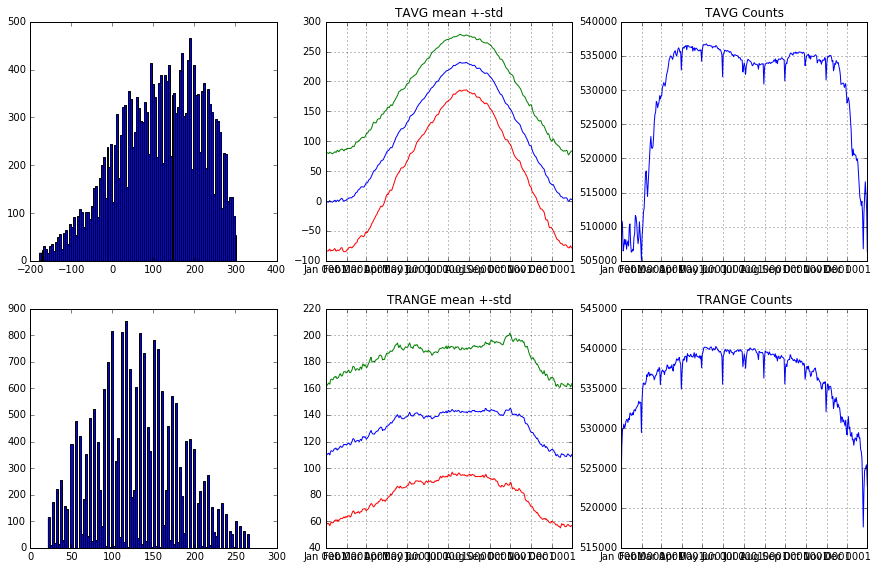

In [7]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    S=STAT[meas]
    low100 = S['low100']
    high100 = S['high100']
    SortedVals = S['SortedVals']
    SortedVals = filter(lambda x: x <= high100 and x >= low100, SortedVals)
    plt.hist(SortedVals, bins=100)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    Mean=S['Mean']
    Std=sqrt(S['Var'])
    YearlyPlots(Mean, ttl=meas+' mean +-std')
    YearlyPlots(Mean+Std, ttl=meas+' mean +-std')
    YearlyPlots(Mean-Std, ttl=meas+' mean +-std')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    NE=S['NE']
    YearlyPlots(NE, ttl=meas+' Counts')

### Plot the Number of measurements recorded each day for TMAX

In [8]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'], ttl='TMAX Counts')

KeyError: 'TMAX'

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


### Answer
* It may because of holidays like Christmas day, people did not work carefully or because it is the end of month
they did not go to work. We can eliminate the top 1% and low 1% data.
* When it is cold, the snow is deep. May be some stations did not work or can not work.



### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

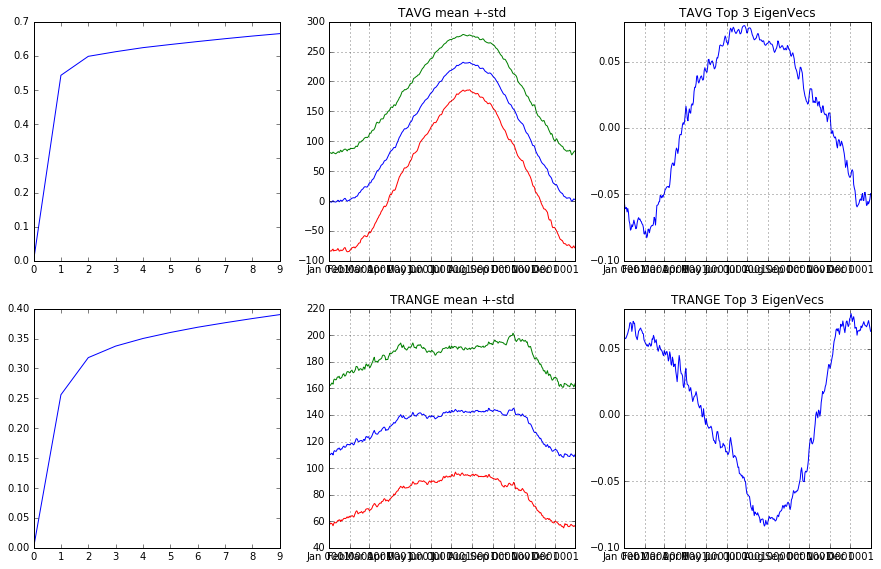

In [21]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    S = STAT[meas]
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    eigval = S['eigval']
    eigval = sorted(eigval, reverse=True)
    result = [0]*10
    total = sum(eigval)
    for i in range(10):
        result[i]=sum(eigval[0:i])/total
    plot(range(10), result)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    Mean=S['Mean']
    Std=sqrt(S['Var'])
    YearlyPlots(Mean, ttl=meas+' mean +-std')
    YearlyPlots(Mean+Std, ttl=meas+' mean +-std')
    YearlyPlots(Mean-Std, ttl=meas+' mean +-std')
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    YearlyPlots(S['eigvec'][:,1:2], ttl=meas+' Top 3 EigenVecs')